In [6]:
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap
import numpy as np
from netCDF4 import Dataset
import matplotlib.animation as animation

file1 = '/home/dlobelle/Kooi_data/data_output/tests/rho_920kgm-3/-170to0lon_Kooi+NEMO_3D_grid10by10_rho920_r1e-05_30days_60dtsecs_5hrsoutdt.nc' #AtlanticKooi+NEMO_3D_grid10by10_rho920_r1e-04_30days_60dtsecs_5hrsoutdt.nc' #

data1 = Dataset(file1,'r')


lons=data1.variables['lon']

time = data1.variables['time'][40,:]/86400
lons1=data1.variables['lon'][:] #,:,:]
lats1=data1.variables['lat'][:] #,:,:]
depths1 =data1.variables['z']#[:,:,:] 

#print(depths1[:,100])

/home/dlobelle/.conda/envs/py3_parcels/lib/python3.7/site-packages/ipykernel_launcher.py:3: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.
  This is separate from the ipykernel package so we can avoid doing imports until


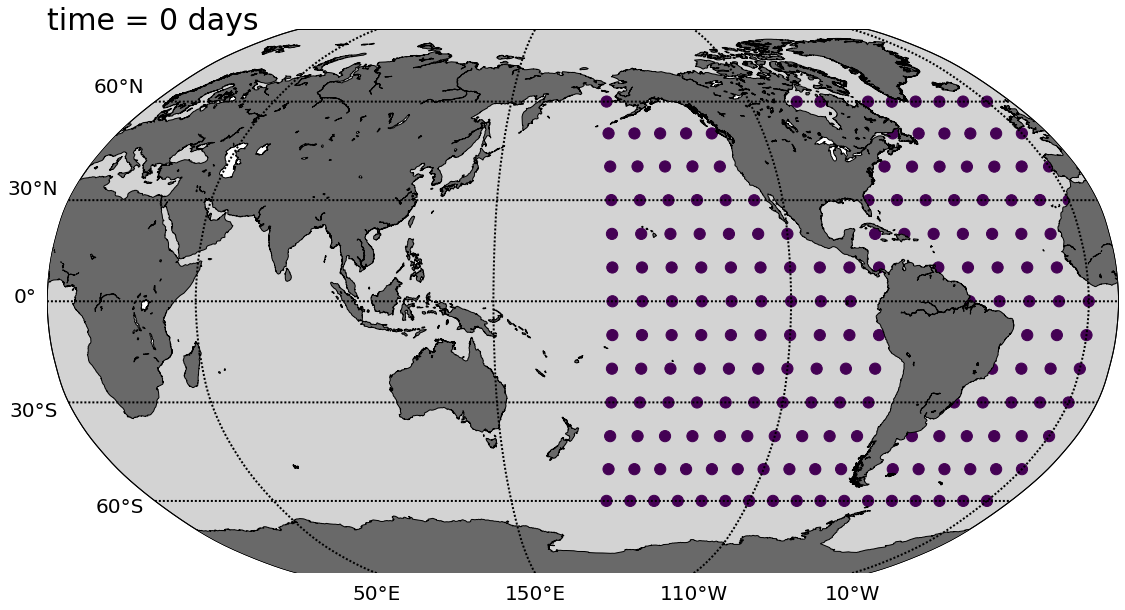

In [8]:
fig = plt.figure(figsize=(20, 10))

m = Basemap(projection='robin',lon_0=-180,resolution='l')
m.drawcoastlines()
m.fillcontinents(color='dimgrey')
m.drawmapboundary(fill_color='lightgray')
m.drawparallels(np.array([-60,-30,0,30,60]), labels=[True, False, False, True], linewidth=2.0, size=20)
m.drawmeridians(np.array([50,150,250,350]), labels=[False, False, False, True], linewidth=2.0, size=20)
#xs, ys = m(lons1[:,0], lats1[:,0])
#scat = m.scatter(xs, ys, marker='.', c='r',s = 500)

#for tt in len(lons1[0]):
tt = 0 #
xs, ys = m(lons1[:,tt], lats1[:,tt])
scat = m.scatter(xs, ys, marker='.', c=depths1[:,tt],s = 500)
time_text = plt.annotate('time = ' + str(int(time[0])) + ' days', xy=(0, 1), xycoords='axes fraction', size = 30)
# xs, ys = m(lons1[:,:], lats1[:,:])
# scat = m.scatter(xs, ys, marker='.', c=depths1,s = 500)
  

In [9]:
def animate(t):
    if t%10 == 0: # Modulus operator; gives the remainder of the left value divided by the right value, where 10/10 = 0
        print('time: ', t)
    scat.set_offsets(np.matrix(m(lons1[:,t], lats1[:,t])).transpose())
    scat.set_array(depths1[:,t]) #np.matrix(m(lons1[:,t], lats1[:,t])).transpose())
    #time_text.annotate('time = ' + str(int(time[t])) + ' days', xy=(0, 1), xycoords='axes fraction', size = 30)
    return scat
 

anim = animation.FuncAnimation(fig, animate, frames=range(0,len(lons1[0])),blit=False)
anim.save('/home/dlobelle/Kooi_data/data_output/tests/movie-170to0.mp4', fps=5, extra_args=['-vcodec', 'libx264'])  

time:  0
time:  0
time:  10
time:  20
time:  30
time:  40
time:  50
time:  60
time:  70
time:  80
time:  90
time:  100
time:  110
time:  120
time:  130
time:  140
